# Global Happiness Report Analysis 🌐😃📰📊📈

## Import modules 📔📚

In [1]:
!python -m pip install -r requirements.txt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable


## 📂 Create Dataset

In [2]:
# to make dataset
# run the file data_generate.py
!python data_generate.py

Data successfully generated and saved as a CSV file named as "global_happiness_report.csv"
Data generation process completed.


## 📌 Main Tasks

### 🔹 Data Preparation

In [3]:
df = pd.read_csv("global_happiness_report.csv")
df["Date"] = pd.to_datetime(df["Date"])

df.head()

Record_ID Country     State_Region       Date  Happiness_Score  \
0  HAPPY_015406      UK       South East 2022-10-03            7.689   
1  HAPPY_005339   India       Tamil Nadu 2022-11-14            6.886   
2  HAPPY_000964  Turkey           Samsun 2017-09-15            3.435   
3  HAPPY_012007  Turkey          Antalya 2023-11-16            6.572   
4  HAPPY_014073  France  Hauts-de-France 2021-01-19            2.563   

   GDP_Per_Capita  Social_Support  Healthy_Life_Expectancy  \
0        76222.93           0.600                     45.0   
1         2988.95           0.856                     52.7   
2         8406.19           1.186                     61.2   
3        27883.42           0.929                     66.8   
4        10817.99           1.191                     72.3   

   Freedom_To_Make_Life_Choices  Generosity  Perceptions_Of_Corruption  \
0                         0.838       0.327                      0.264   
1                         1.099       0.217                      0.859   
2                         0.833       0.500                      0.573   
3                         0.303      -0.110                      0.207   
4                         1.021      -0.220                      0.101   

   Positive_Affect  Negative_Affect  Confidence_In_Government  
0            0.801            0.511                     0.176  
1            0.470            0.480                     0.715  
2              NaN            0.360                     0.167  
3            0.856            0.119                     0.480  
4            0.428            0.605                     0.735

### 🔹 Data Cleaning

In [4]:
df.isna().sum()

Record_ID                         0
Country                           0
State_Region                      0
Date                              0
Happiness_Score                 305
GDP_Per_Capita                  291
Social_Support                  350
Healthy_Life_Expectancy         281
Freedom_To_Make_Life_Choices    282
Generosity                      275
Perceptions_Of_Corruption       264
Positive_Affect                 284
Negative_Affect                 282
Confidence_In_Government        294
dtype: int64

In [5]:
df = df.dropna()
df.isna().sum()

Record_ID                       0
Country                         0
State_Region                    0
Date                            0
Happiness_Score                 0
GDP_Per_Capita                  0
Social_Support                  0
Healthy_Life_Expectancy         0
Freedom_To_Make_Life_Choices    0
Generosity                      0
Perceptions_Of_Corruption       0
Positive_Affect                 0
Negative_Affect                 0
Confidence_In_Government        0
dtype: int64

In [6]:
if df.duplicated().sum() > 0:
    print(f"{df.duplicated().sum()} Duplicate rows found and will be removed.")
    df = df.drop_duplicates()
    print(f"Now there are {df.duplicated().sum()} duplicate rows after removal.")
else:
    print("No duplicate rows found.")

120 Duplicate rows found and will be removed.
Now there are 0 duplicate rows after removal.


### 🔹 Data Analysis

In [7]:
# ===============================
# 1. Basic Info
# ===============================
print("Dataset Shape:", df.shape)
print("\nColumn Data Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isna().sum())

numeric_cols = [
    "Happiness_Score","GDP_Per_Capita","Social_Support",
    "Healthy_Life_Expectancy","Freedom_To_Make_Life_Choices",
    "Generosity","Perceptions_Of_Corruption",
    "Positive_Affect","Negative_Affect","Confidence_In_Government"
]
print("\nSummary Statistics:\n", df[numeric_cols].describe(include="all"))

missing_percent = (df.isna().sum() / len(df)) * 100
print("\nMissing Values (%):\n", missing_percent)

# ===============================
# 2. Country-level Analysis
# ===============================
avg_happiness = df.groupby("Country")["Happiness_Score"].mean().sort_values(ascending=False)
print("\nTop 10 Countries by Average Happiness Score:\n", avg_happiness.head(10))

avg_gdp = df.groupby("Country")["GDP_Per_Capita"].mean().sort_values(ascending=False)
print("\nTop 10 Countries by Avg GDP Per Capita:\n", avg_gdp.head(10))

avg_social_support = df.groupby("Country")["Social_Support"].mean().sort_values(ascending=False)
print("\nTop 10 Countries by Avg Social Support:\n", avg_social_support.head(10))

avg_life_expectancy = df.groupby("Country")["Healthy_Life_Expectancy"].mean().sort_values(ascending=False)
print("\nTop 10 Countries by Healthy Life Expectancy:\n", avg_life_expectancy.head(10))

# ===============================
# 3. Time Series Analysis
# ===============================
time_series = df.groupby("Date")[["Happiness_Score","Positive_Affect","Negative_Affect"]].mean()
print("\nOverall Time Series (first 10 rows):\n", time_series.head(10))

# Daily change in Happiness Score
time_series["Daily_Happiness_Change"] = time_series["Happiness_Score"].diff()
print("\nDaily Change in Happiness Score (first 10 rows):\n", time_series["Daily_Happiness_Change"].head(10))

# ===============================
# 4. Correlations
# ===============================
corr_matrix = df[numeric_cols].corr()
print("\nCorrelation Matrix:\n", corr_matrix)

# ===============================
# 5. Region-level Analysis
# ===============================
state_happiness = df.groupby(["Country","State_Region"])["Happiness_Score"].mean().sort_values(ascending=False)
print("\nTop 10 States/Regions by Average Happiness Score:\n", state_happiness.head(10))

# ===============================
# 6. Derived Metrics
# ===============================
# Example: Ratio of Positive to Negative Affect
df["Affect_Ratio"] = df["Positive_Affect"] / df["Negative_Affect"].replace(0, np.nan)

print("\nGlobal Average Positive/Negative Affect Ratio:", df["Affect_Ratio"].mean())

# Example: Happiness to GDP ratio
df["Happiness_to_GDP"] = df["Happiness_Score"] / df["GDP_Per_Capita"].replace(0, np.nan)
print("Global Average Happiness-to-GDP Ratio:", df["Happiness_to_GDP"].mean())

Dataset Shape: (13140, 14)

Column Data Types:
 Record_ID                               object
Country                                 object
State_Region                            object
Date                            datetime64[ns]
Happiness_Score                        float64
GDP_Per_Capita                         float64
Social_Support                         float64
Healthy_Life_Expectancy                float64
Freedom_To_Make_Life_Choices           float64
Generosity                             float64
Perceptions_Of_Corruption              float64
Positive_Affect                        float64
Negative_Affect                        float64
Confidence_In_Government               float64
dtype: object

Missing Values:
 Record_ID                       0
Country                         0
State_Region                    0
Date                            0
Happiness_Score                 0
GDP_Per_Capita                  0
Social_Support                  0
Healthy_Life_Expectancy 

### 🔹 Data Visualization

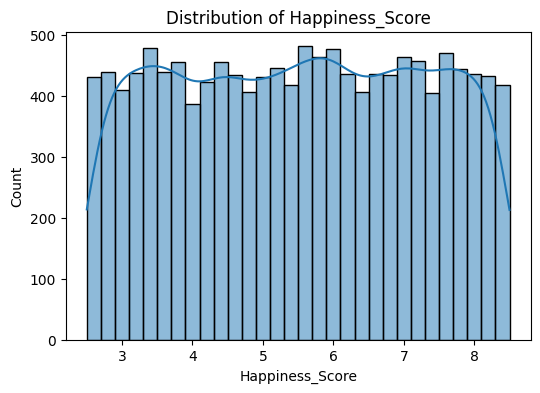

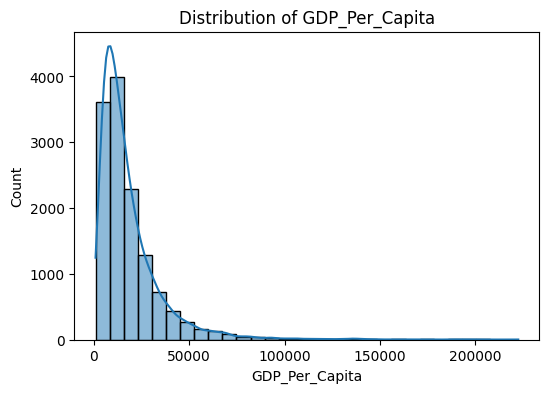

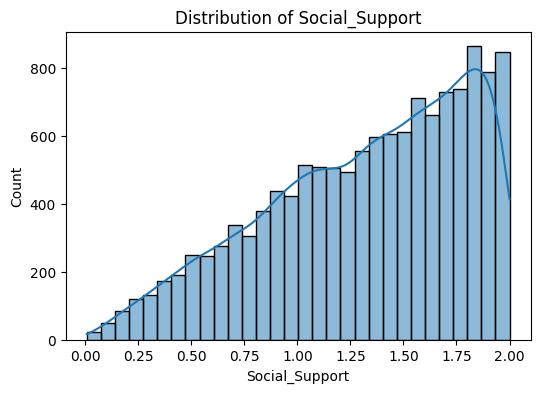

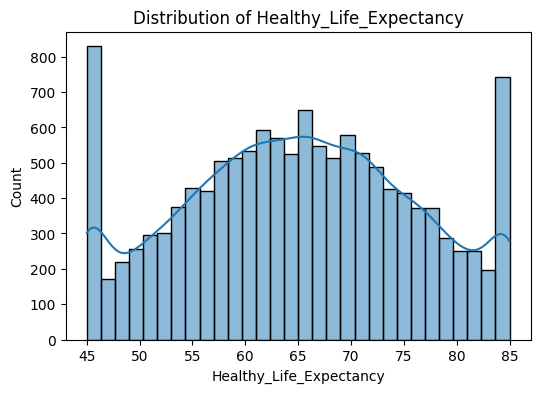

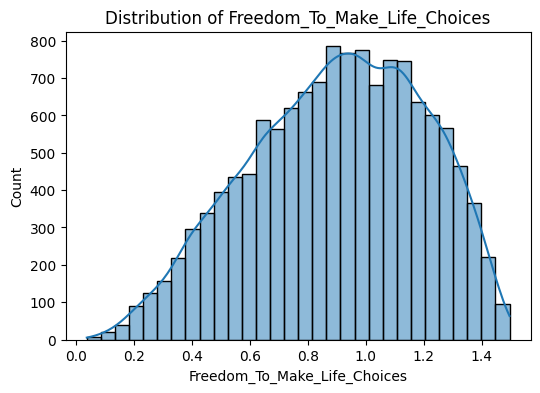

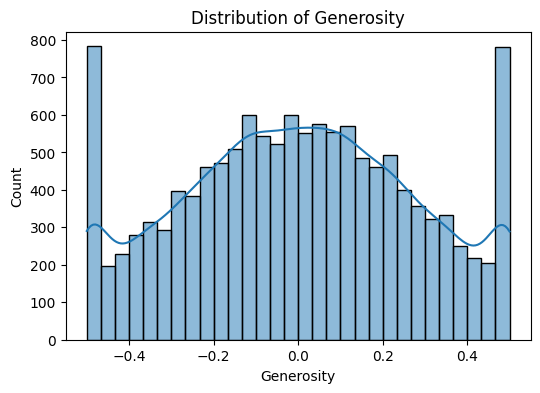

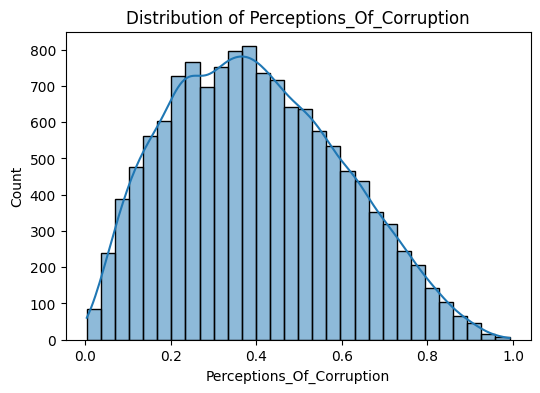

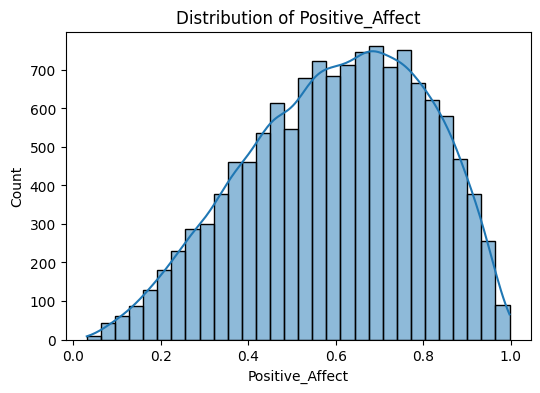

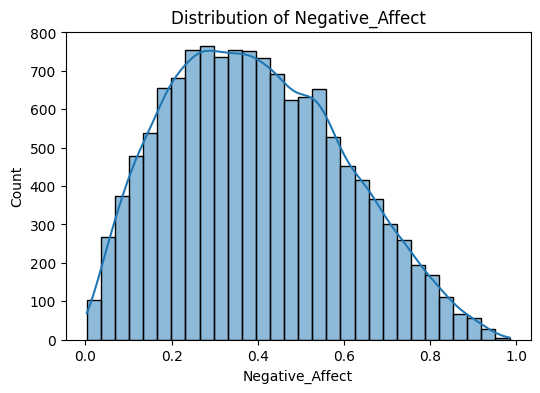

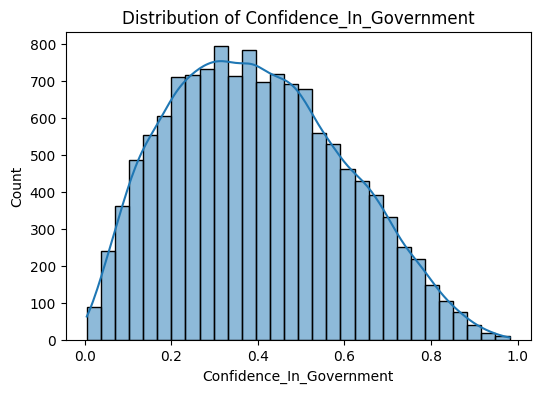

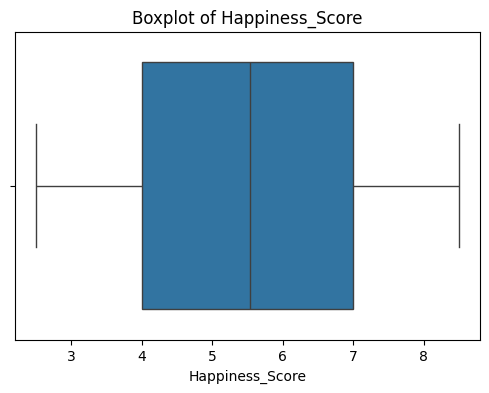

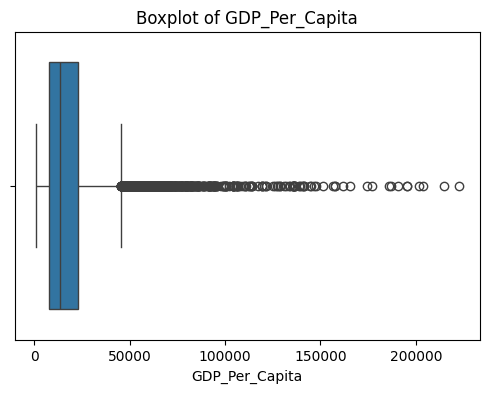

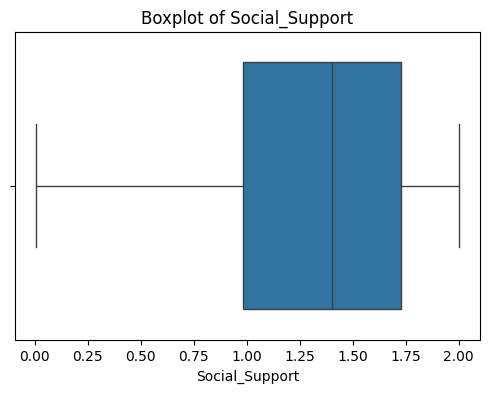

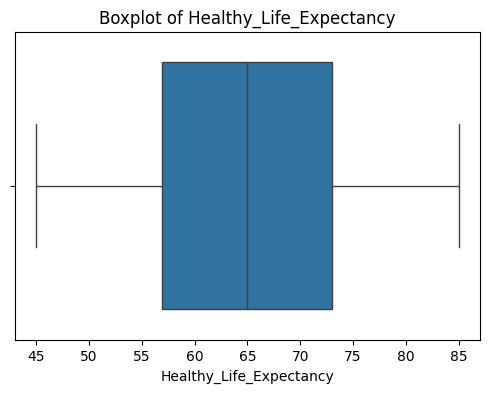

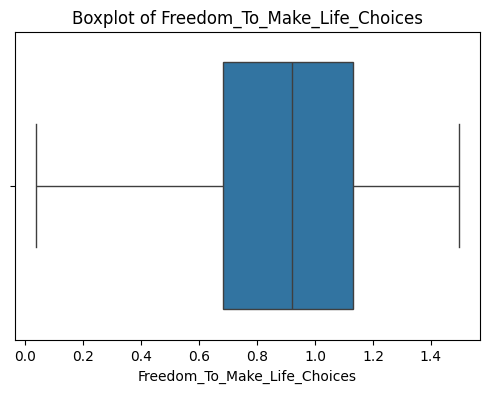

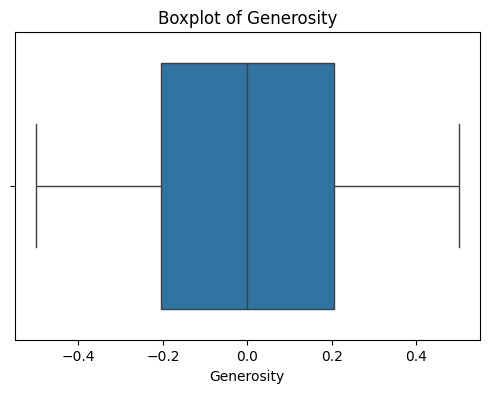

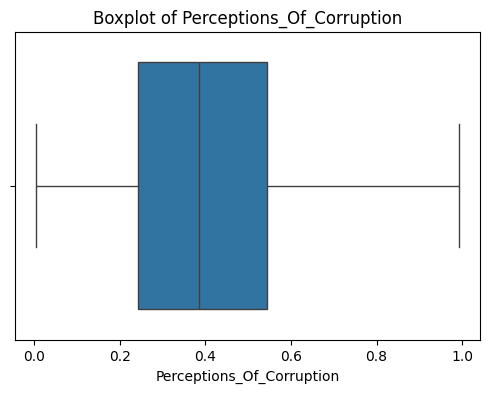

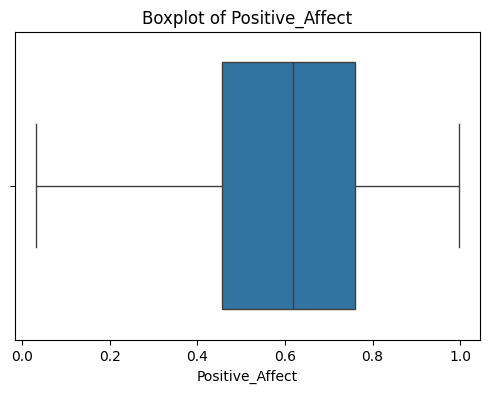

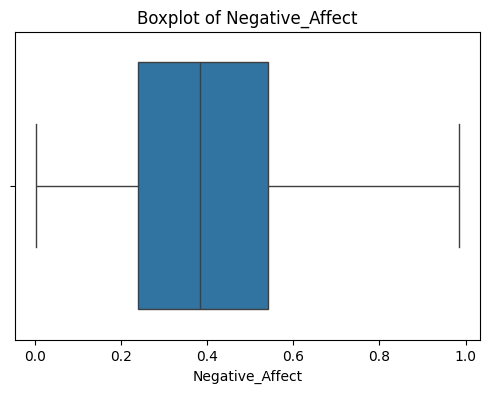

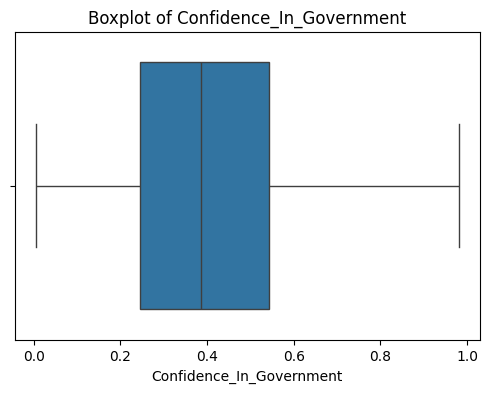

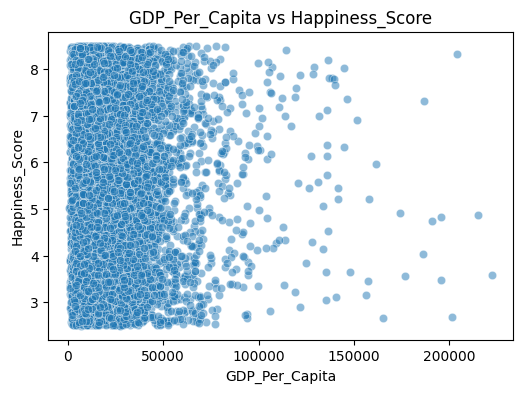

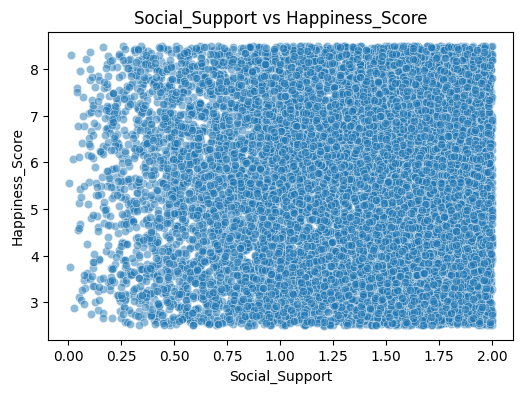

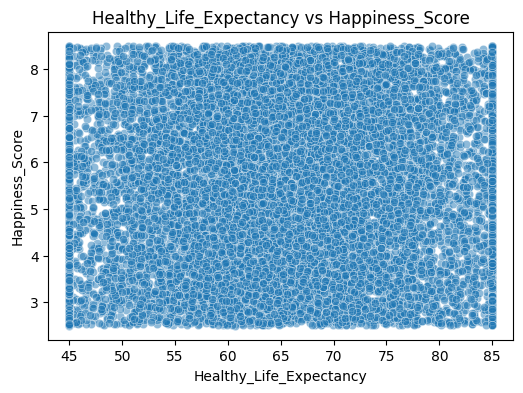

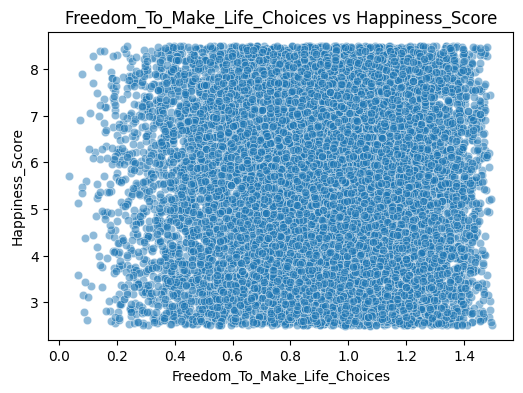

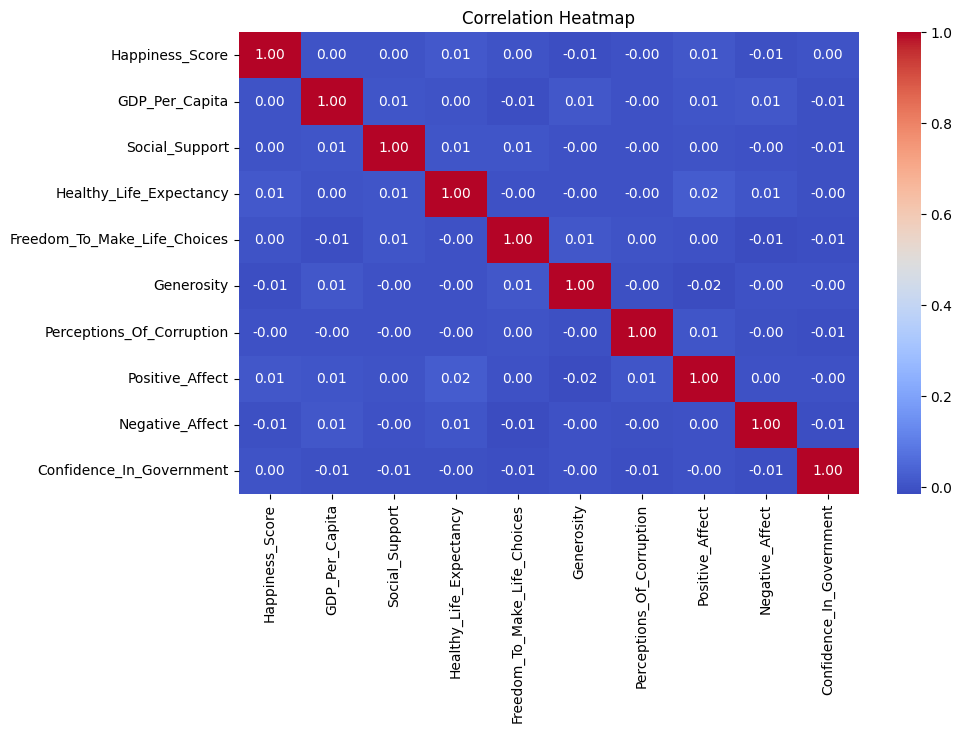

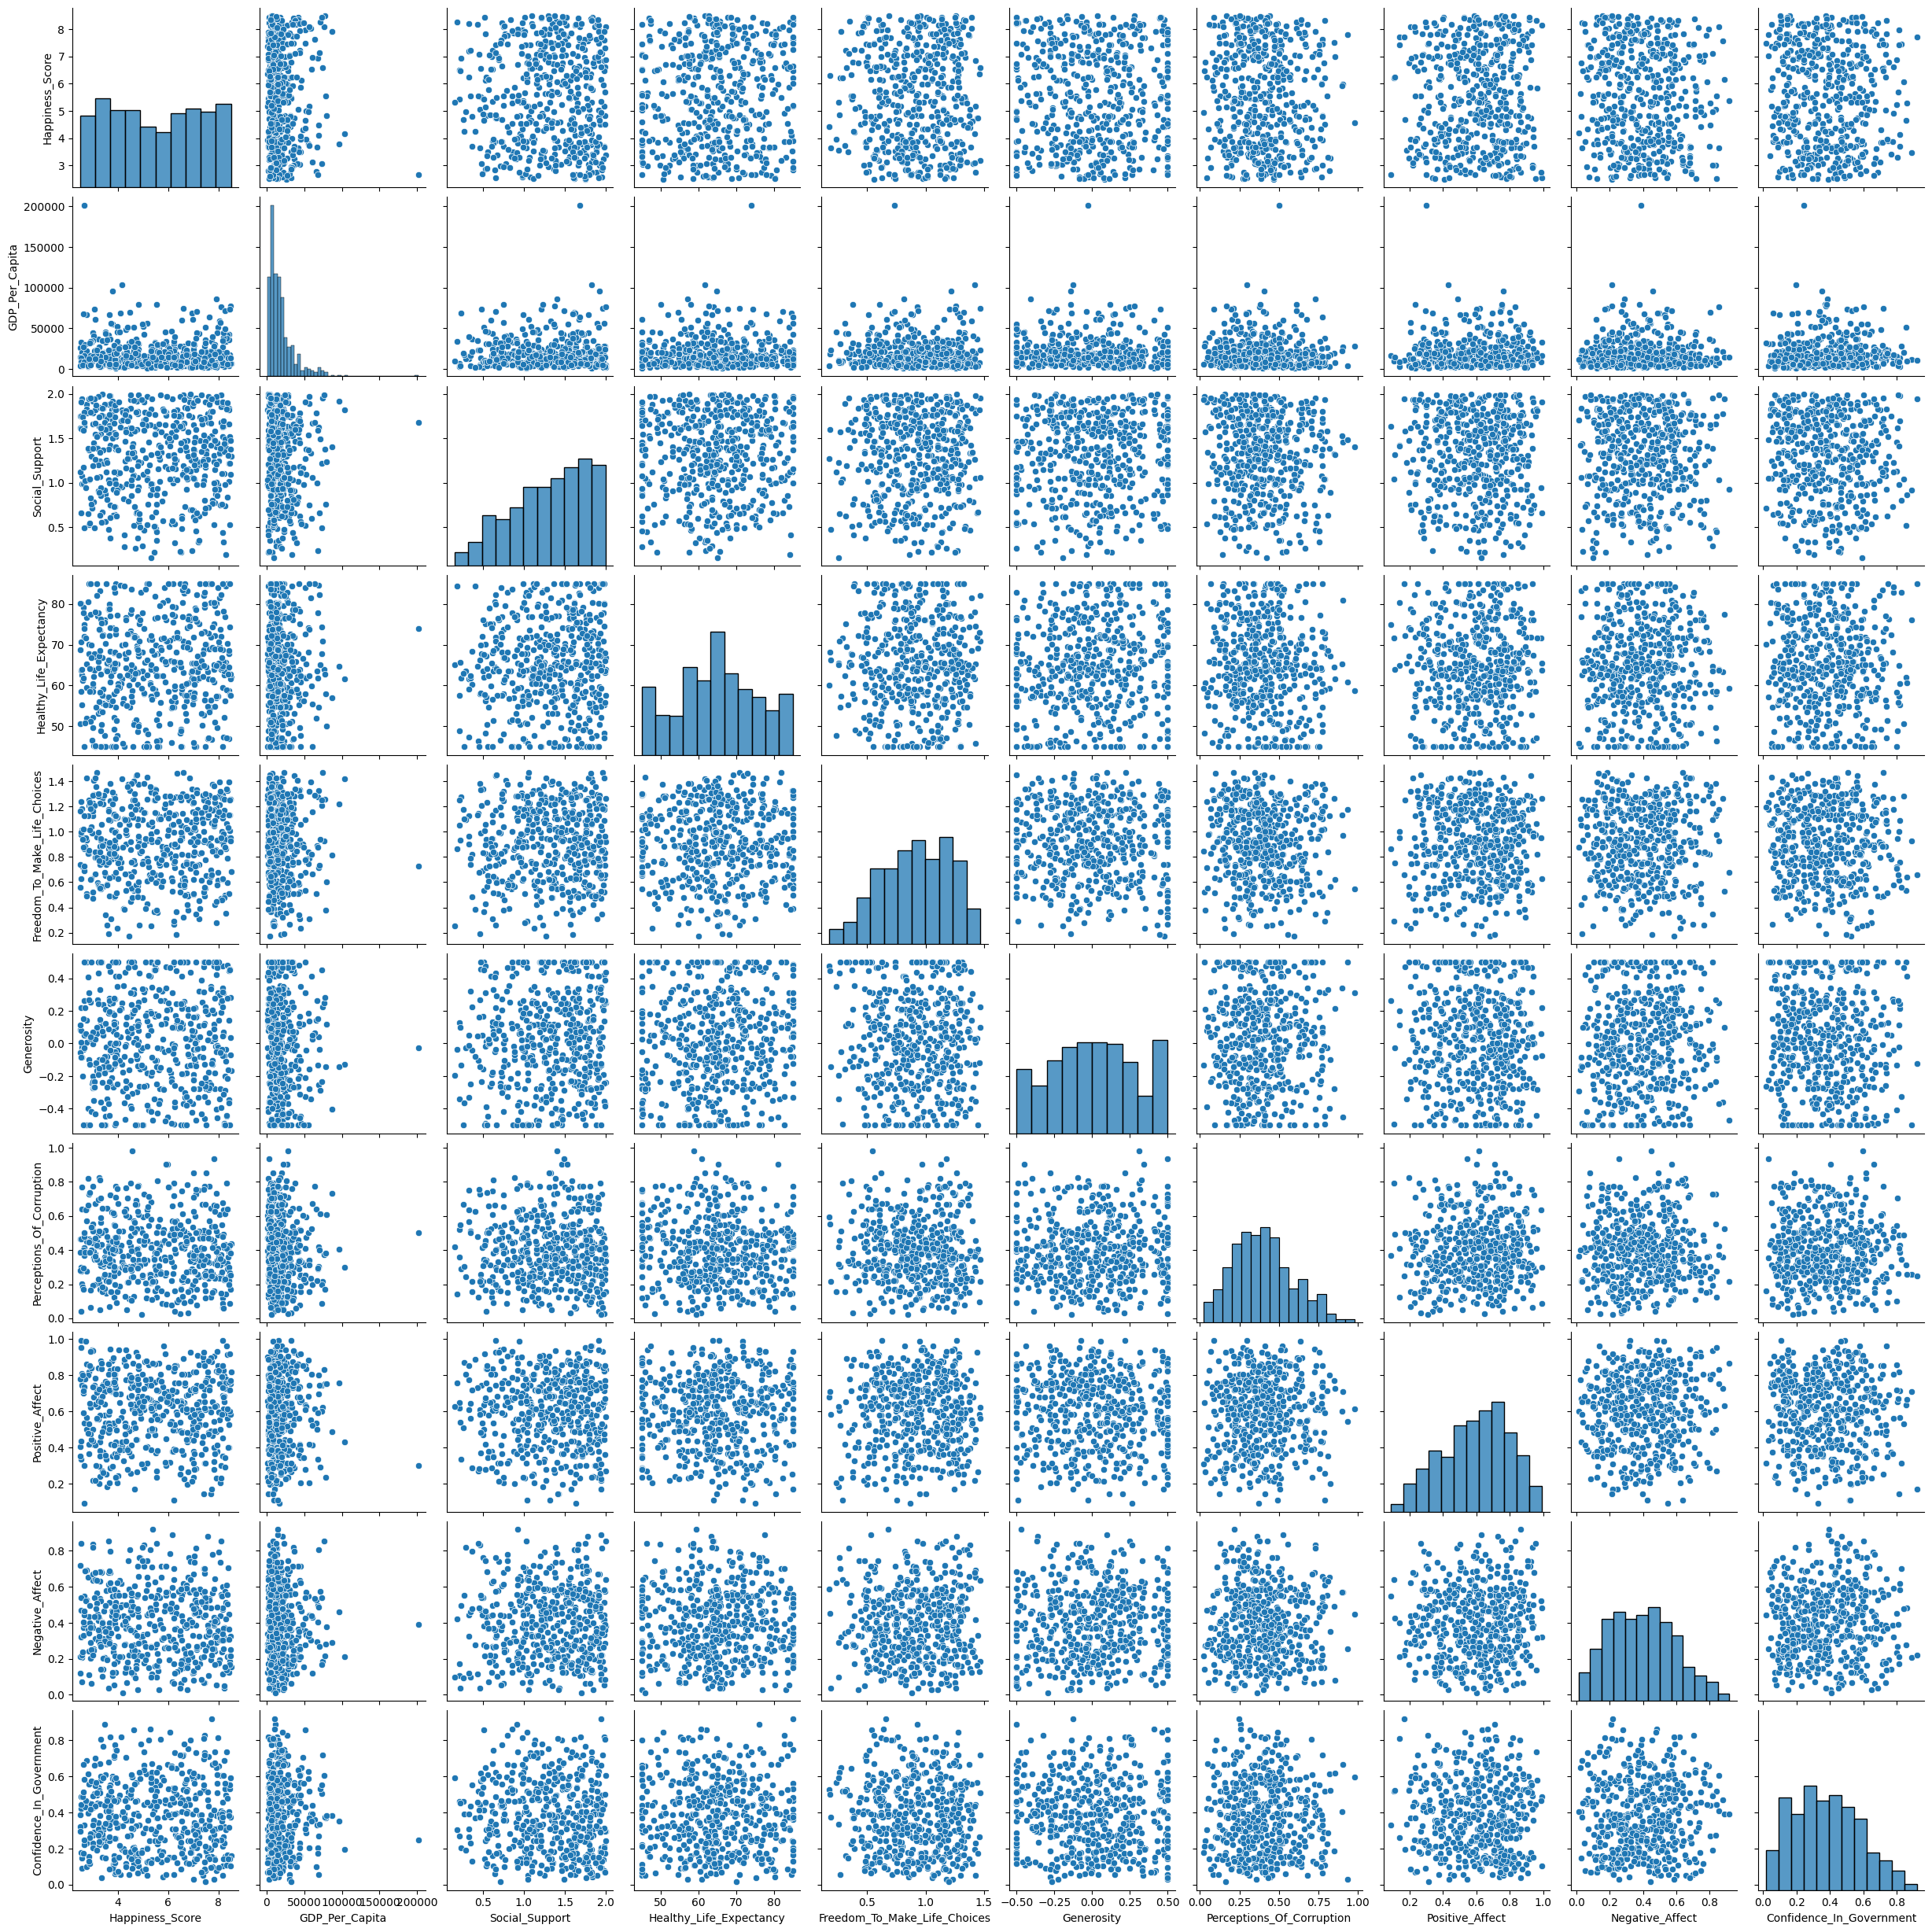

<Figure size 1200x600 with 0 Axes>

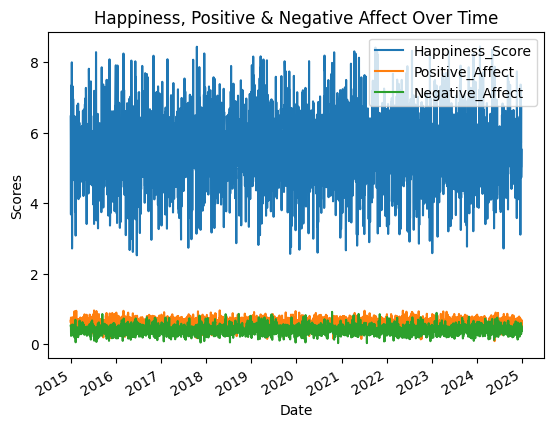

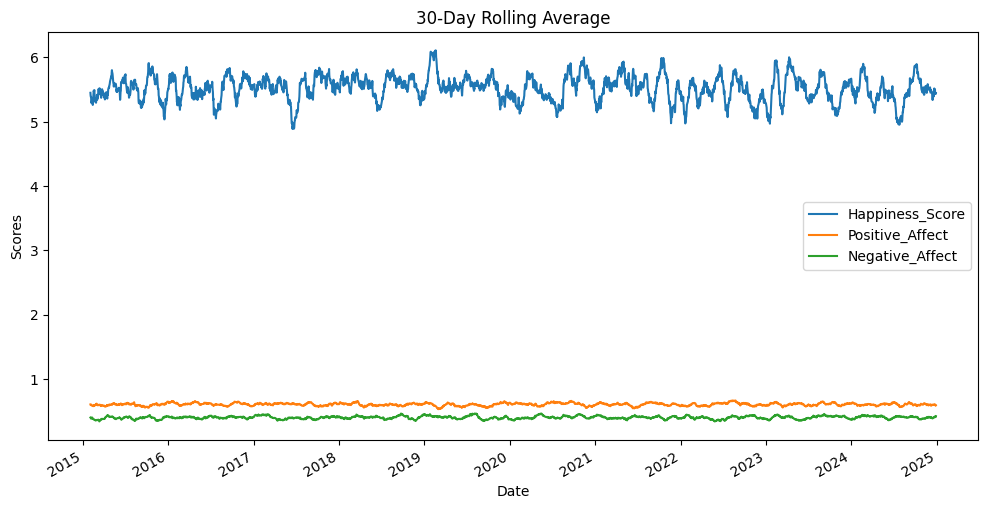

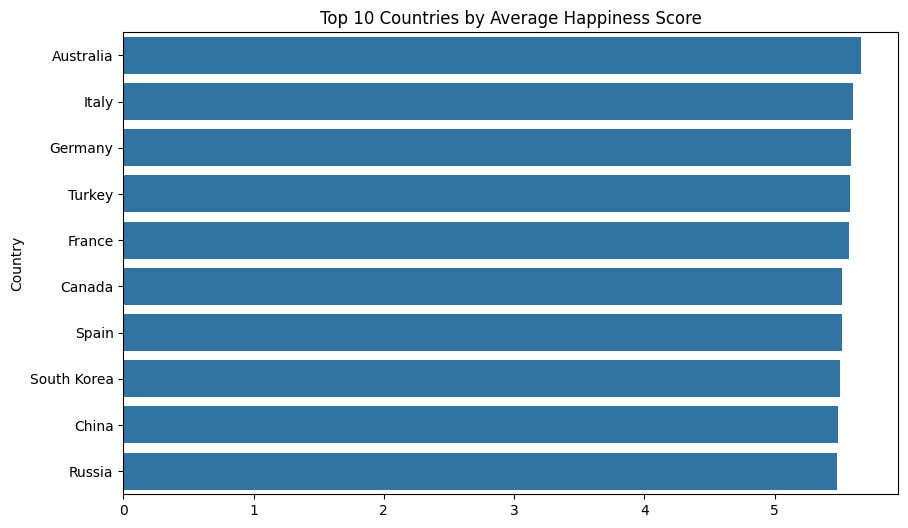

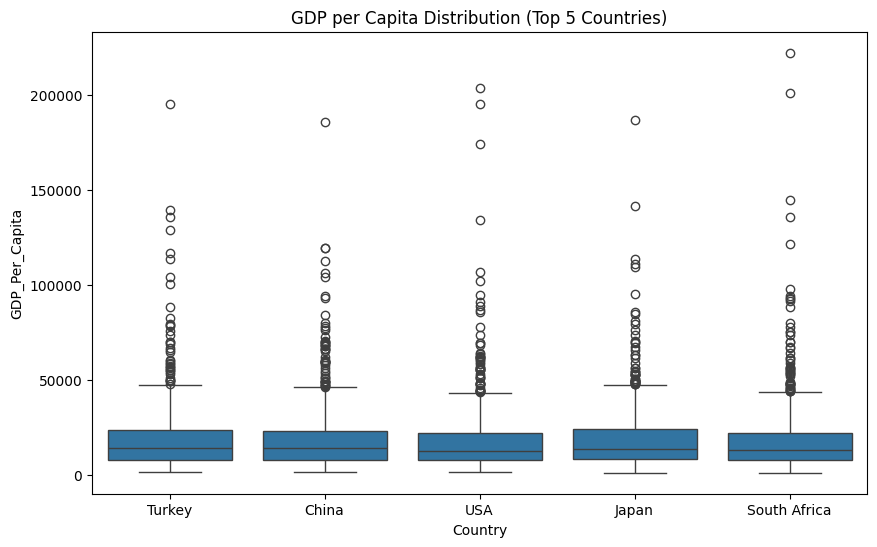

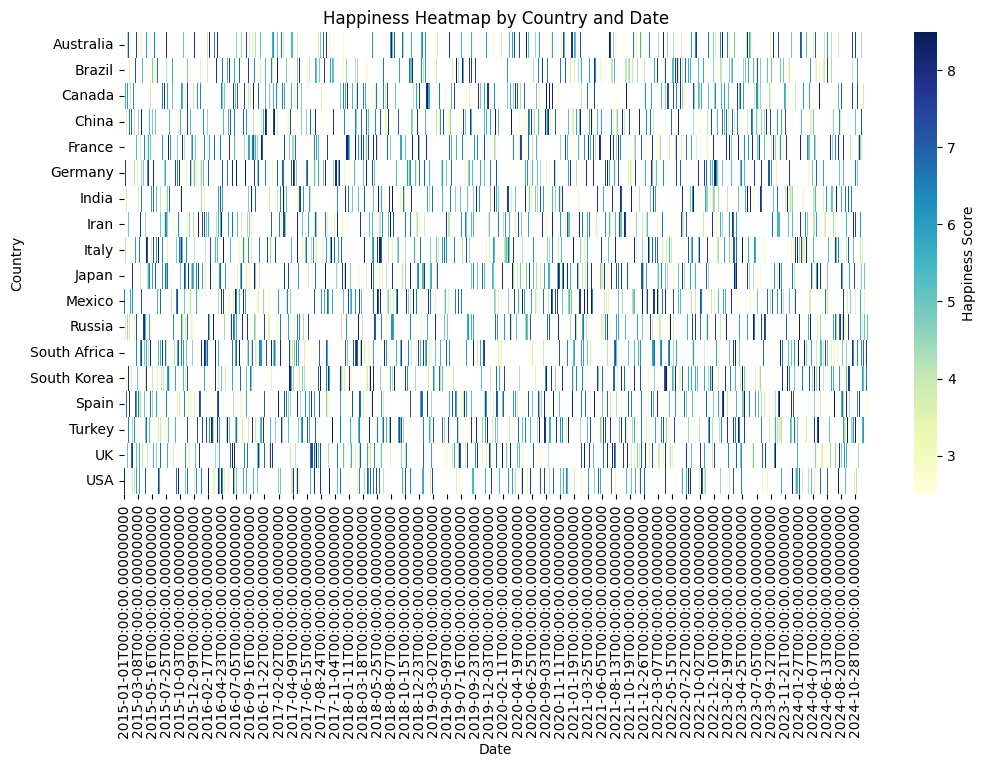

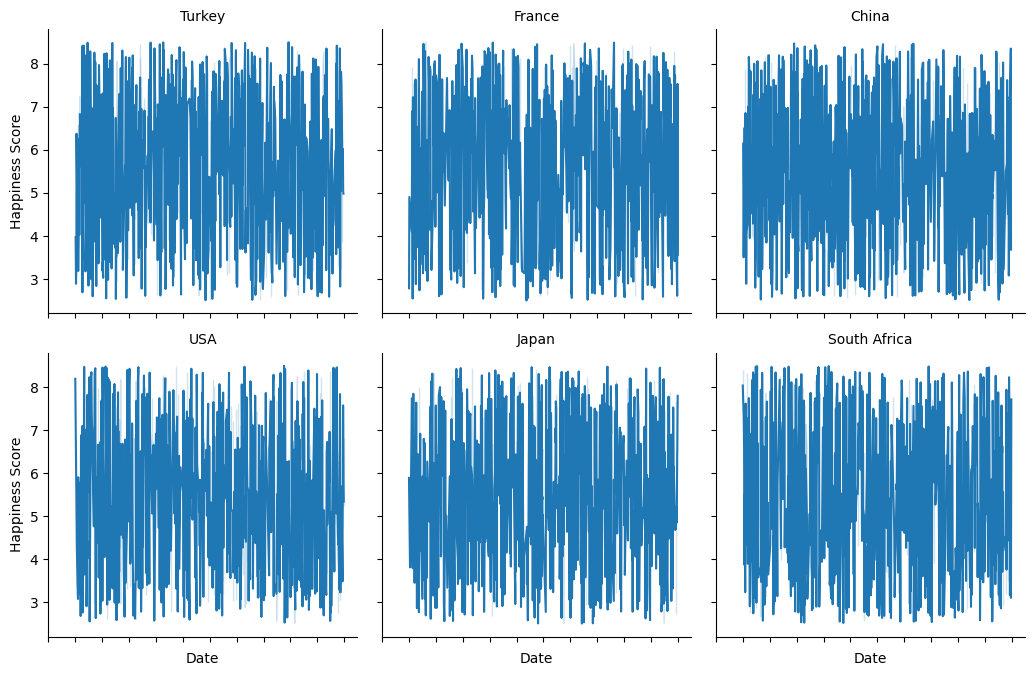

In [8]:
# ===============================
# 1. Univariate Analysis
# ===============================

# Histograms
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Boxplots
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# ===============================
# 2. Bivariate Analysis
# ===============================
# Scatterplots
pairs = [
    ("GDP_Per_Capita","Happiness_Score"),
    ("Social_Support","Happiness_Score"),
    ("Healthy_Life_Expectancy","Happiness_Score"),
    ("Freedom_To_Make_Life_Choices","Happiness_Score")
]

for x,y in pairs:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x=x, y=y, alpha=0.5)
    plt.title(f"{x} vs {y}")
    plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Pairplot (sample for speed)
sns.pairplot(df[numeric_cols].dropna().sample(500, random_state=42))
plt.show()

# ===============================
# 3. Time Series Analysis
# ===============================
if "Date" in df.columns:
    time_group = df.groupby("Date")[["Happiness_Score","Positive_Affect","Negative_Affect"]].mean()

    # Trends over time
    plt.figure(figsize=(12,6))
    time_group.plot()
    plt.title("Happiness, Positive & Negative Affect Over Time")
    plt.ylabel("Scores")
    plt.show()

    # Rolling average (30-day)
    time_group_rolling = time_group.rolling(30).mean()
    time_group_rolling.plot(figsize=(12,6))
    plt.title("30-Day Rolling Average")
    plt.ylabel("Scores")
    plt.show()

# ===============================
# 4. Country & Region Analysis
# ===============================
# Top 10 countries by Happiness Score
top_countries = df.groupby("Country")["Happiness_Score"].mean().nlargest(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries by Average Happiness Score")
plt.show()

# Boxplot of GDP by Country (top 5)
top5 = df["Country"].value_counts().head(5).index
plt.figure(figsize=(10,6))
sns.boxplot(data=df[df["Country"].isin(top5)],
            x="Country", y="GDP_Per_Capita")
plt.title("GDP per Capita Distribution (Top 5 Countries)")
plt.show()

# ===============================
# 5. Advanced Visualizations
# ===============================
# Heatmap of Happiness by Country & Date
pivot = df.pivot_table(values="Happiness_Score", index="Date", columns="Country", aggfunc="mean")
plt.figure(figsize=(12,6))
sns.heatmap(pivot.T, cmap="YlGnBu", cbar_kws={'label': 'Happiness Score'})
plt.title("Happiness Heatmap by Country and Date")
plt.show()

# FacetGrid: Happiness trend by sample countries
sample_countries = df["Country"].value_counts().head(6).index
g = sns.FacetGrid(df[df["Country"].isin(sample_countries)], col="Country", col_wrap=3, height=3.5)
g.map_dataframe(sns.lineplot, x="Date", y="Happiness_Score")
g.set_titles("{col_name}")
g.set_axis_labels("Date","Happiness Score")
g.set_xticklabels(rotation=90)
plt.show()